**What's in this notebook:**
- General EDA
- Overshoot EDA
- Undershoot EDA

**Summary of findings:**
- Most of the differences are small
- 4809 error difference in total
- 2179 overshoot
- 2630 undershoot
- Most of the differences are smaller in value (i.e. not that drastic or closer to 0 difference)
- Most have a difference or curve over the 0.2 difference value
- There's little to no correlation between the e_difference and the other variables (i.e. terrible correlation heatmap and scatterplot matrix)
- Distribution are variables are normal

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [9]:
df = pd.read_csv("EDA_large_error.csv")

In [11]:
df.shape

(4809, 170)

In [20]:
df = df[df.columns[(~df.columns.str.contains("BIN")).tolist()]].copy()
df

w         h         x         y  ground_truth_e_bbox_yf  \
0     0.379808  0.497596  0.519231  0.424279                   0.270   
1     0.420673  0.605769  0.486779  0.423077                   0.210   
2     0.389423  0.685096  0.487981  0.558894                   0.295   
3     0.112981  0.170673  0.318510  0.150240                   0.165   
4     0.350962  0.463942  0.492788  0.429087                   0.245   
...        ...       ...       ...       ...                     ...   
4804  0.290865  0.487981  0.520433  0.417067                   0.095   
4805  0.201923  0.322115  0.290865  0.439904                   0.095   
4806  0.387019  0.581731  0.477163  0.454327                   0.310   
4807  0.269231  0.305288  0.480769  0.352163                   0.085   
4808  0.413462  0.598558  0.485577  0.508413                   0.245   

      predicted_e_bbox_yf  
0                0.217577  
1                0.252301  
2                0.214765  
3                0.151012  
4                0.223561  
...                   ...  
4804             0.116744  
4805             0.070130  
4806             0.258714  
4807             0.051783  
4808             0.237200  

[4809 rows x 6 columns]

### Making new column
---

In [21]:
df['e_difference'] = df["ground_truth_e_bbox_yf"] - df["predicted_e_bbox_yf"]

In [52]:
df['abs_e_difference'] = abs(df['e_difference'])
df_abs = df[['w', 'h', 'x', 'y', 'abs_e_difference']]

In [53]:
df_over = df[df['e_difference'] < 0]
df_over = df_over[['w', 'h', 'x', 'y', 'e_difference']]
df_over.shape

(2179, 5)

In [54]:
df_under = df[df['e_difference'] > 0]
df_under = df_under[['w', 'h', 'x', 'y', 'e_difference']]
df_under.shape

(2630, 5)

In [55]:
assert df_over.shape[0] + df_under.shape[0] == df.shape[0]

### General/Absolute
---

*Overlapping histogram*

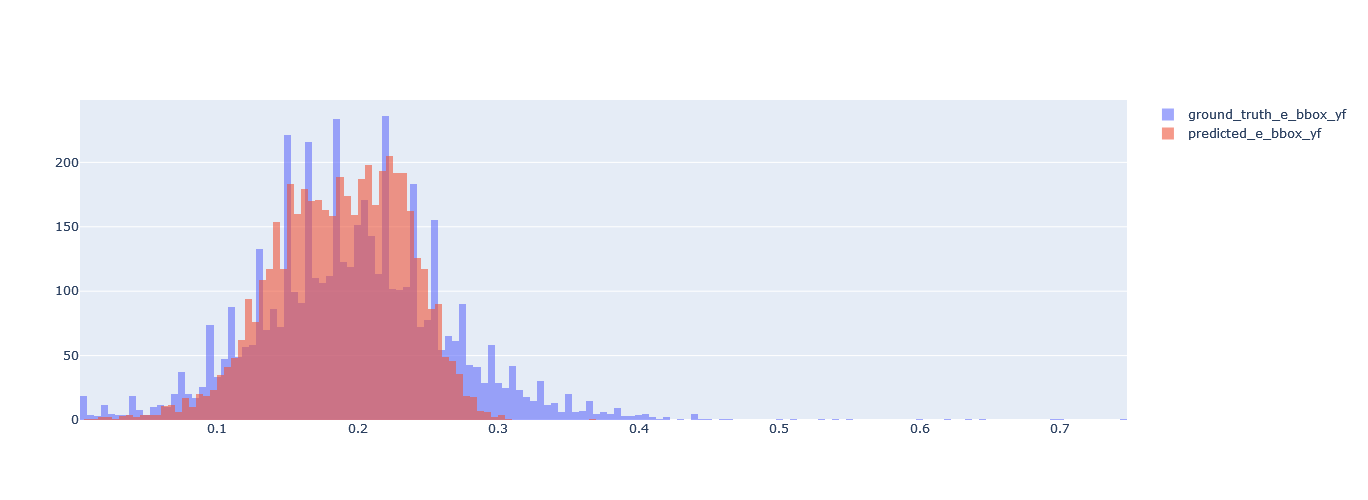

In [93]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=df['ground_truth_e_bbox_yf'], name='ground_truth_e_bbox_yf'))
fig.add_trace(go.Histogram(x=df['predicted_e_bbox_yf'], name='predicted_e_bbox_yf'))
fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.60)
fig.update_layout(height=500, width=1200)    
fig.show()

*Checking for correlation via. scatter matrix*

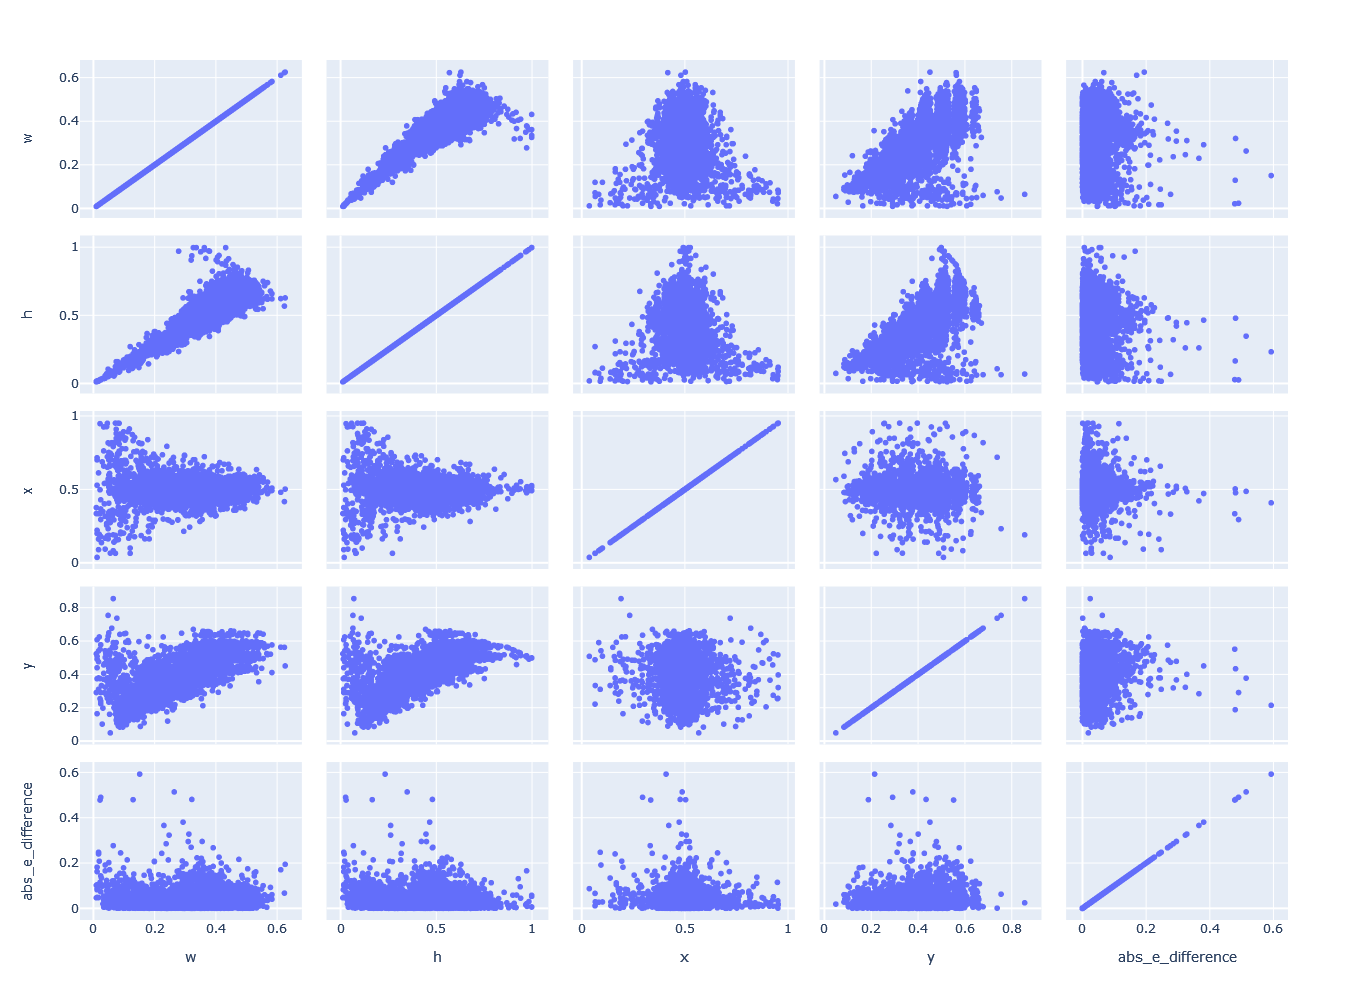

In [94]:
fig = px.scatter_matrix(df_abs)
fig.update_layout(height=1000, width=1400)    
fig.show()

*Checking for skewness via. box plot*

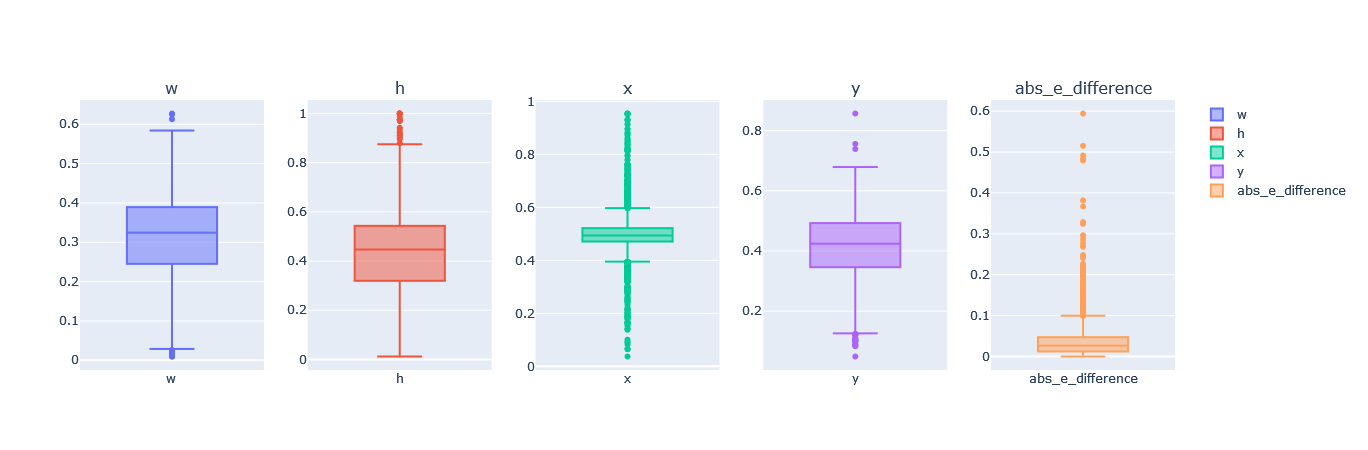

In [97]:
fig = make_subplots(rows=1, cols=5, subplot_titles=df_abs.columns.tolist())

x_count = 1
y_count = 1

for column in df_abs:           
    fig.add_trace(go.Box(y=df_abs[column], name=column), row=x_count, col=y_count)
    
    if y_count == 5:
        x_count += 1
        y_count = 1
    else:
        y_count += 1

fig.update_layout(height=450, width=1200)    
fig.show()

*Checking for distribution via. histogram*

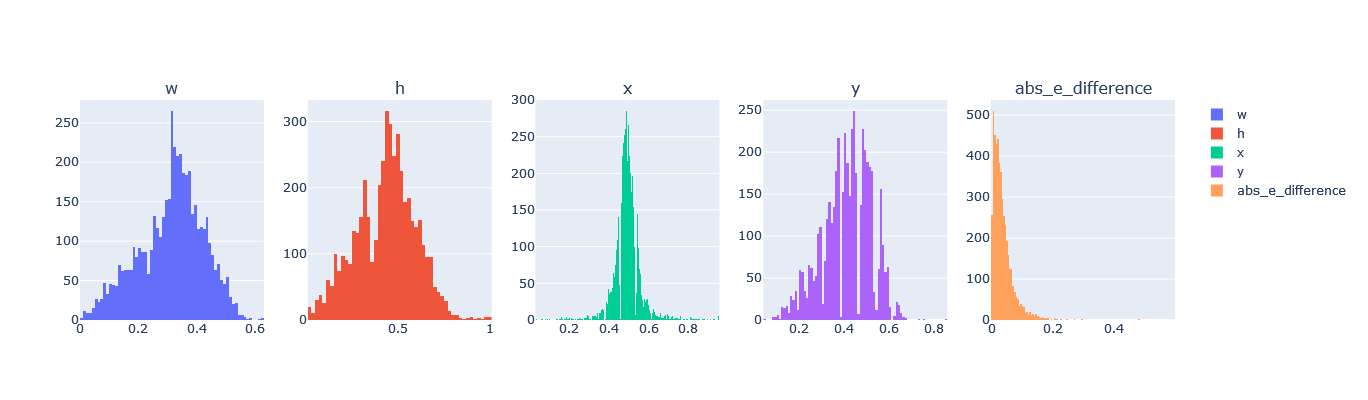

In [98]:
fig = make_subplots(rows=1, cols=5, subplot_titles=df_abs.columns.tolist())

x_count = 1
y_count = 1

for column in df_abs:           
    fig.add_trace(go.Histogram(x=df_abs[column], name=column), row=x_count, col=y_count)
    
    if y_count == 5:
        x_count += 1
        y_count = 1
    else:
        y_count += 1

fig.update_layout(height=400, width=1200)    
fig.show()

*Checking for correlation via. correlation heatmap*

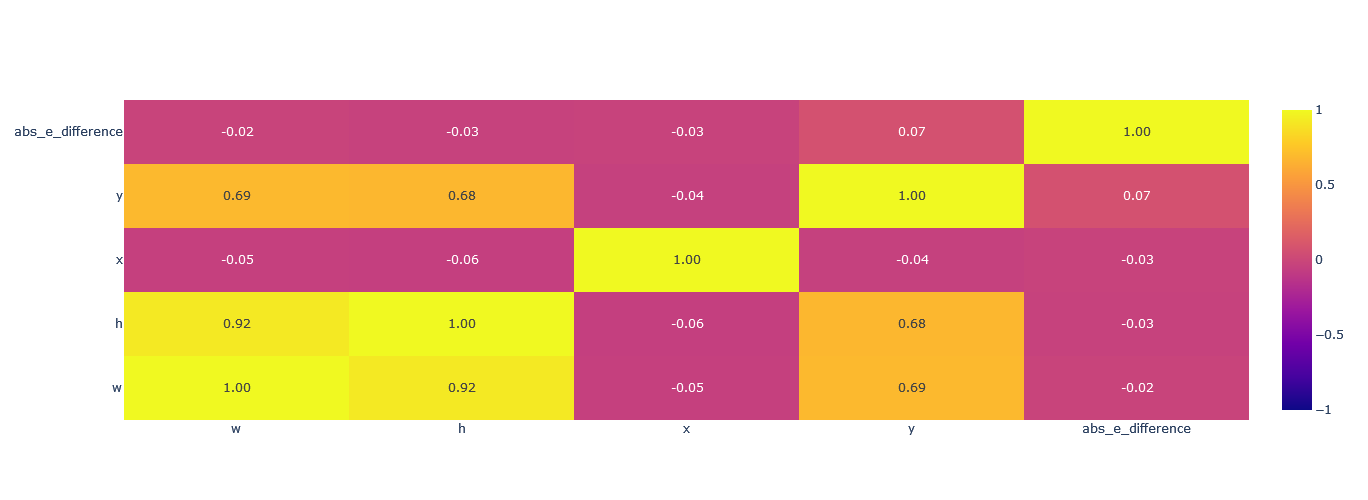

In [99]:
df_corr = df_abs.corr()
fig = go.Figure()
fig.add_trace(
    go.Heatmap(
        x = df_corr.columns,
        y = df_corr.index,
        z = np.array(df_corr),
        text=df_corr.values,
        texttemplate='%{text:.2f}',
        zmax = 1.0,
        zmin = -1.0
    )
)
fig.update_layout(height=500, width=1000)    
fig.show()

### Overshoot
---

*Checking for correlation via. scatter matrix*

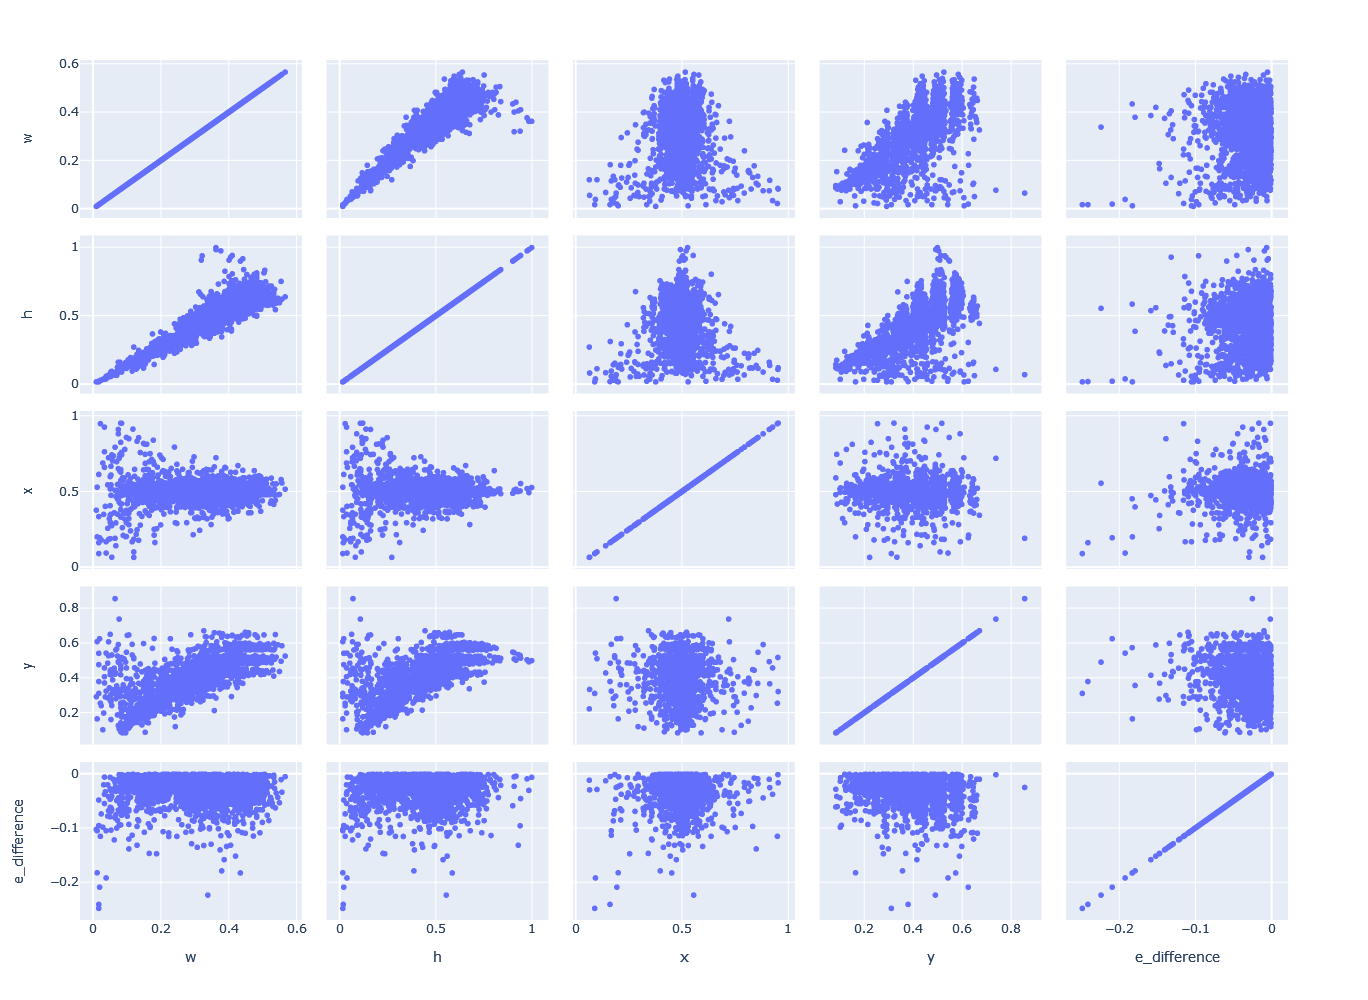

In [58]:
fig = px.scatter_matrix(df_over)
fig.update_layout(height=1000, width=1400)    
fig.show()

*Checking for skewness via. box plot*

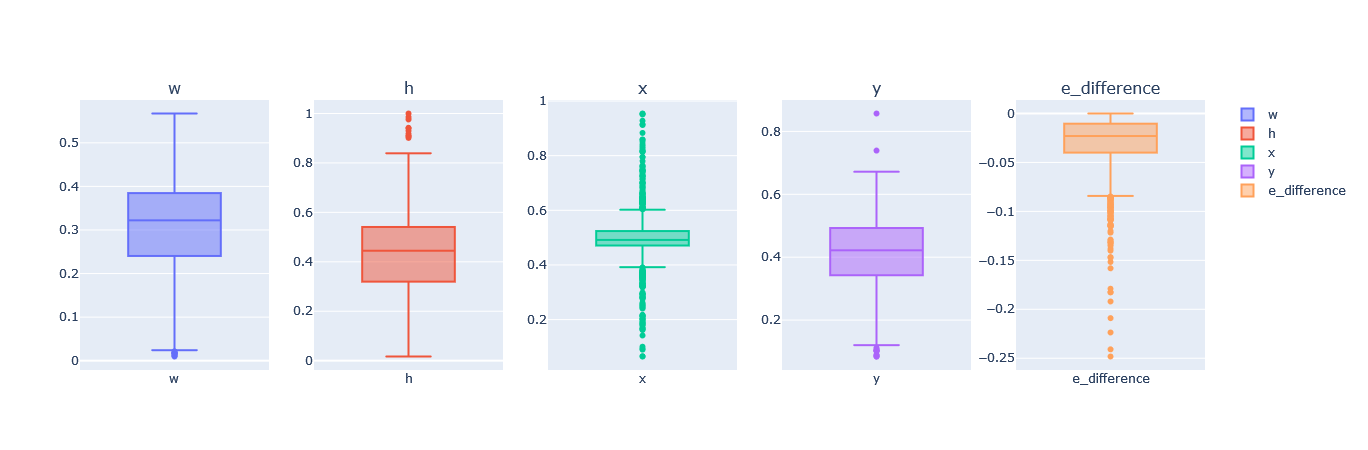

In [66]:
fig = make_subplots(rows=1, cols=5, subplot_titles=df_over.columns.tolist())

x_count = 1
y_count = 1

for column in df_over:           
    fig.add_trace(go.Box(y=df_over[column], name=column), row=x_count, col=y_count)
    
    if y_count == 5:
        x_count += 1
        y_count = 1
    else:
        y_count += 1

fig.update_layout(height=450, width=1200)    
fig.show()

*Checking for distribution via. histogram*

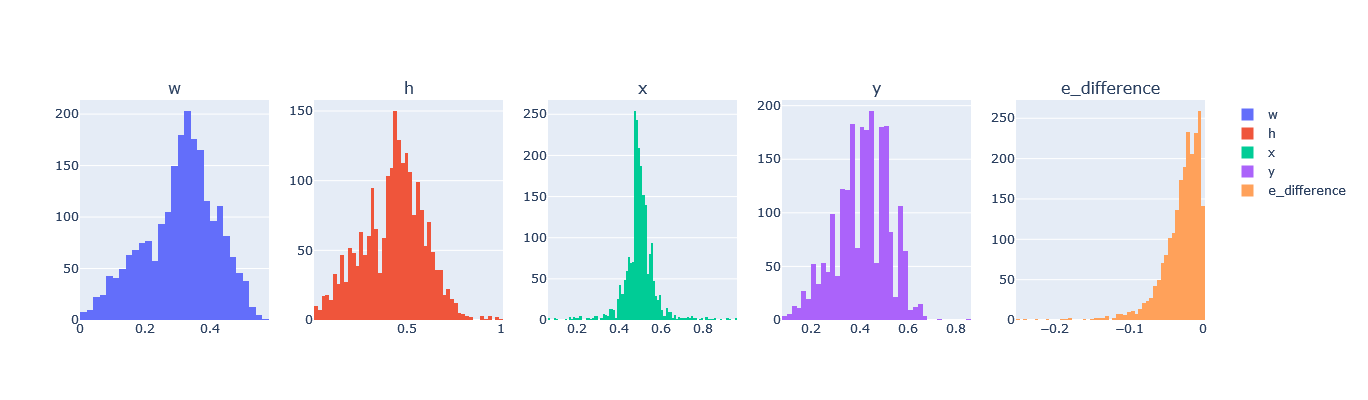

In [69]:
fig = make_subplots(rows=1, cols=5, subplot_titles=df_over.columns.tolist())

x_count = 1
y_count = 1

for column in df_over:           
    fig.add_trace(go.Histogram(x=df_over[column], name=column), row=x_count, col=y_count)
    
    if y_count == 5:
        x_count += 1
        y_count = 1
    else:
        y_count += 1

fig.update_layout(height=400, width=1200)    
fig.show()

*Checking for correlation via. correlation heatmap*

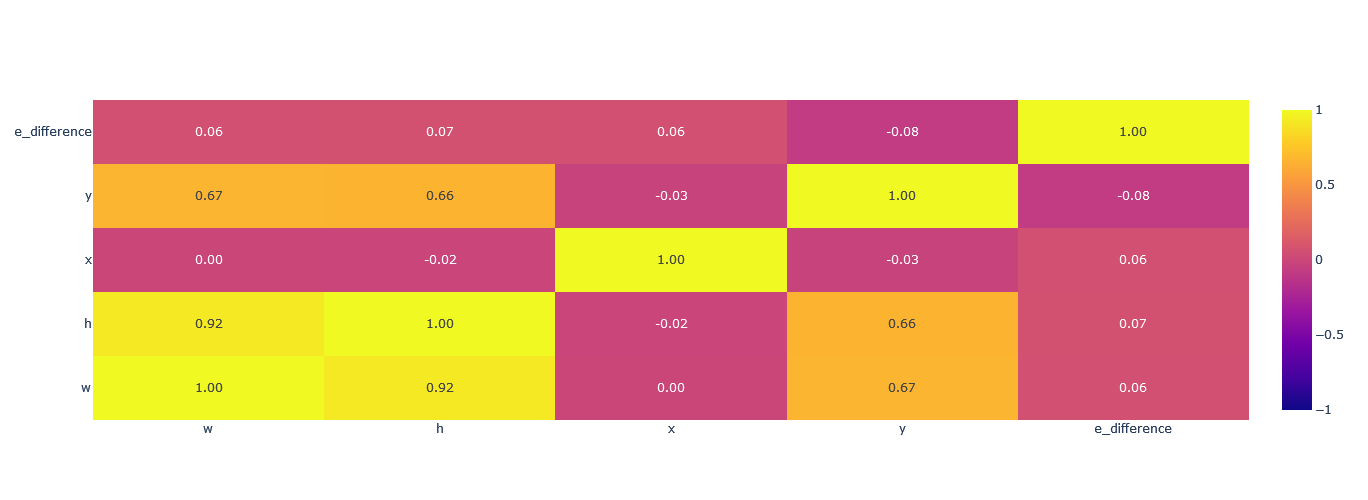

In [72]:
df_corr = df_over.corr()
fig = go.Figure()
fig.add_trace(
    go.Heatmap(
        x = df_corr.columns,
        y = df_corr.index,
        z = np.array(df_corr),
        text=df_corr.values,
        texttemplate='%{text:.2f}',
        zmax = 1.0,
        zmin = -1.0
    )
)
fig.update_layout(height=500, width=1000)    
fig.show()

### Undershoot
---

*Checking for correlation via. scatter matrix*

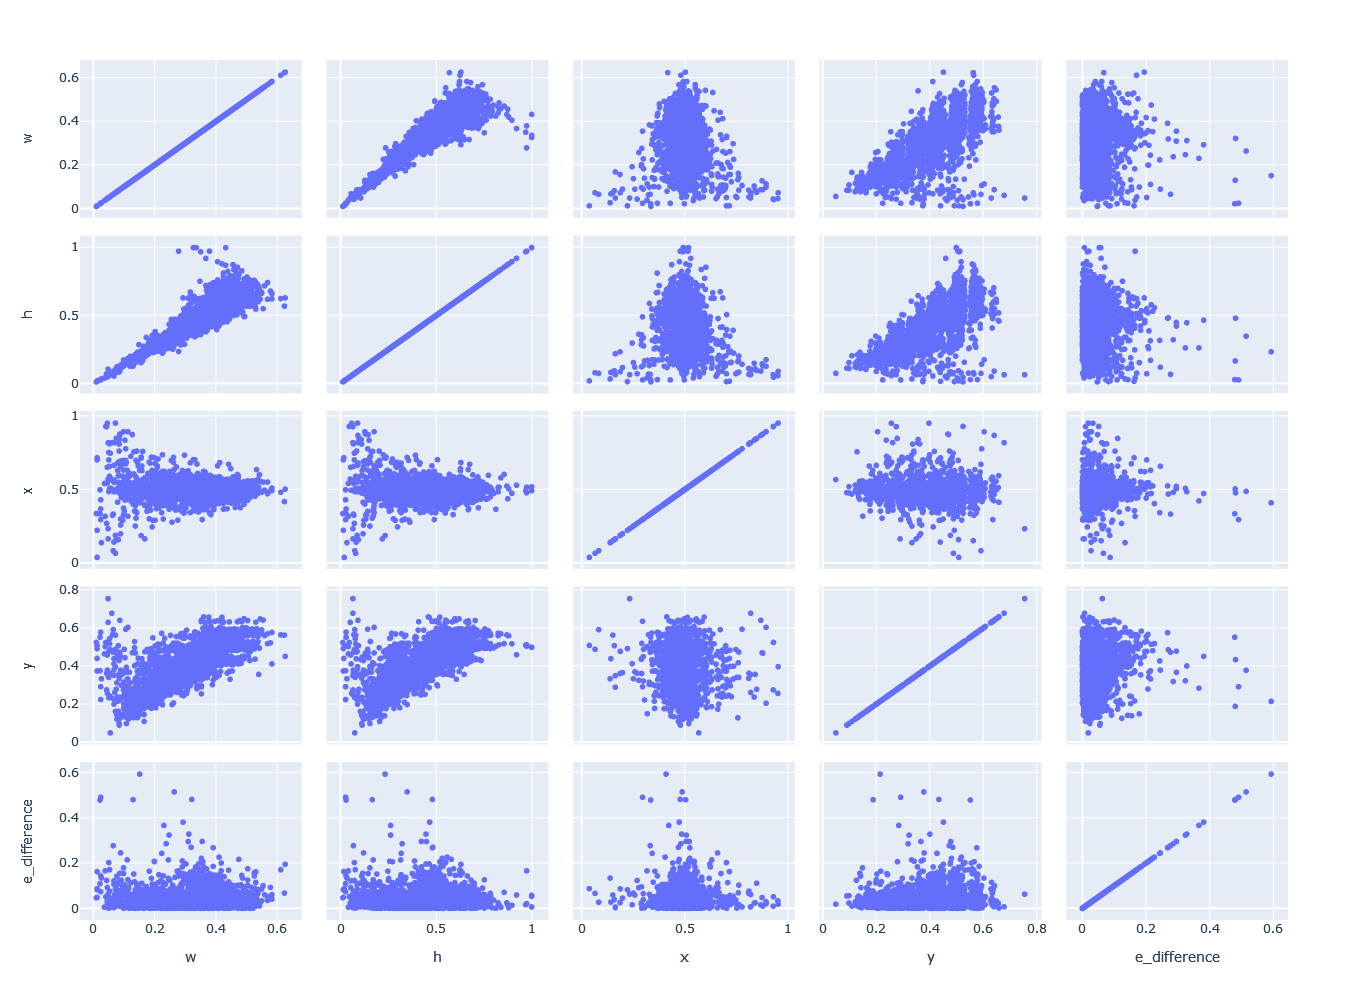

In [74]:
fig = px.scatter_matrix(df_under)
fig.update_layout(height=1000, width=1400)    
fig.show()

*Checking for skewness via. box plot*

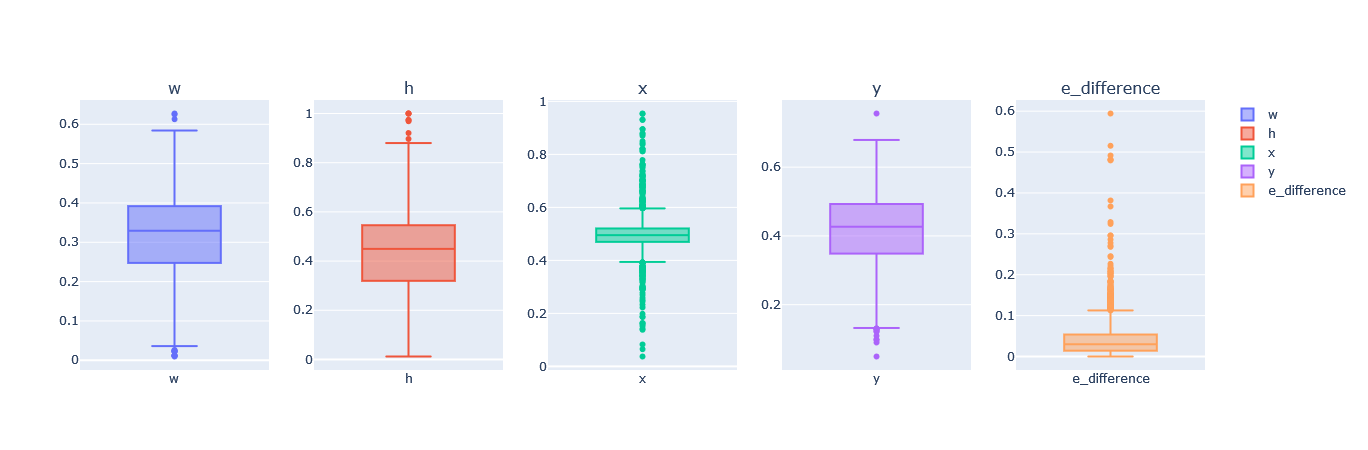

In [75]:
fig = make_subplots(rows=1, cols=5, subplot_titles=df_under.columns.tolist())

x_count = 1
y_count = 1

for column in df_under:           
    fig.add_trace(go.Box(y=df_under[column], name=column), row=x_count, col=y_count)
    
    if y_count == 5:
        x_count += 1
        y_count = 1
    else:
        y_count += 1

fig.update_layout(height=450, width=1200)    
fig.show()

*Checking for distribution via. histogram*

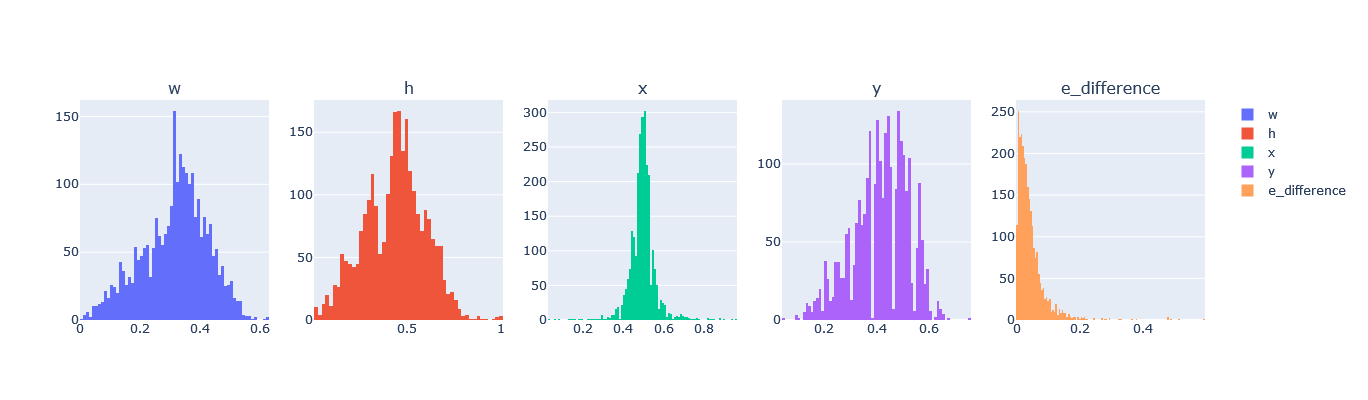

In [76]:
fig = make_subplots(rows=1, cols=5, subplot_titles=df_under.columns.tolist())

x_count = 1
y_count = 1

for column in df_under:           
    fig.add_trace(go.Histogram(x=df_under[column], name=column), row=x_count, col=y_count)
    
    if y_count == 5:
        x_count += 1
        y_count = 1
    else:
        y_count += 1

fig.update_layout(height=400, width=1200)    
fig.show()

*Checking for correlation via. correlation heatmap*

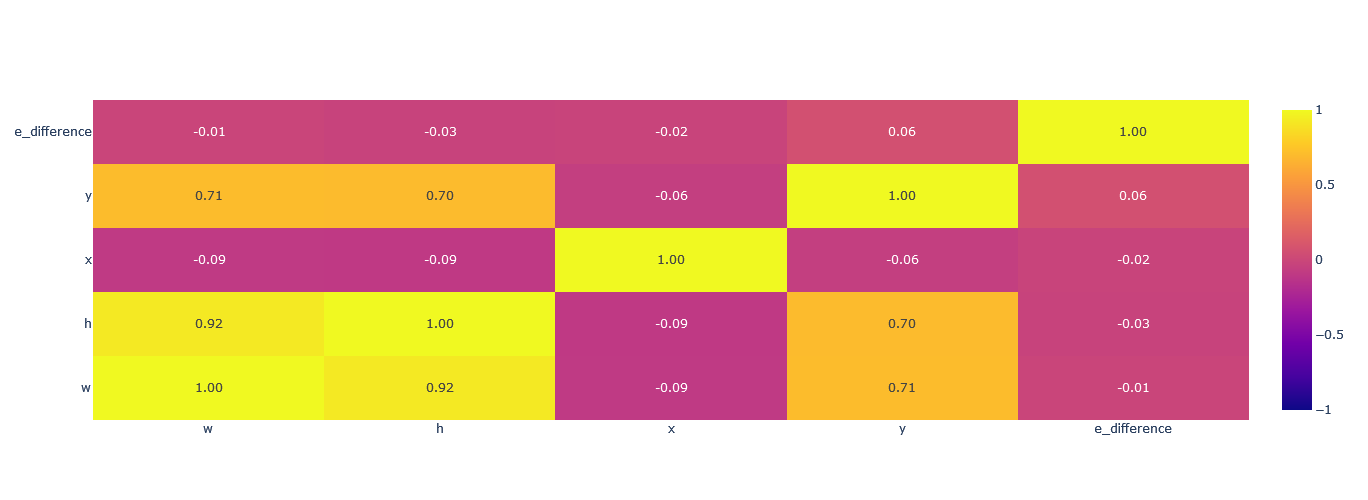

In [77]:
df_corr = df_under.corr()
fig = go.Figure()
fig.add_trace(
    go.Heatmap(
        x = df_corr.columns,
        y = df_corr.index,
        z = np.array(df_corr),
        text=df_corr.values,
        texttemplate='%{text:.2f}',
        zmax = 1.0,
        zmin = -1.0
    )
)
fig.update_layout(height=500, width=1000)    
fig.show()